In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.distributions import norm , t

## Generating normally distributed sample data

norm.rvs() has keyword parameters
- location parameter (center of the distribution, population mean)
- scale parameter (width of the distribution, population standard deviation)


```
    loc : array_like, optional
        Location parameter (default=0).
    scale : array_like, optional
        Scale parameter (default=1).
    size : int or tuple of ints, optional
        Defining number of random variates (default is 1).
```



We use here an example motivated by the Albany April daily mean temp climatology (unit5):

- mean=47.7 F
- stddev=8.7 F

In [6]:
n=30*10# 30 days * 10 years
m=47.7
s=8.7
x=norm.rvs(loc=m,scale=s,size=n)
ypos=np.zeros(n)

print(f"sample mean {(np.mean(x)):.2f} and standard deviation {(np.std(x)):.2f}")

sample mean 48.05 and standard deviation 9.06


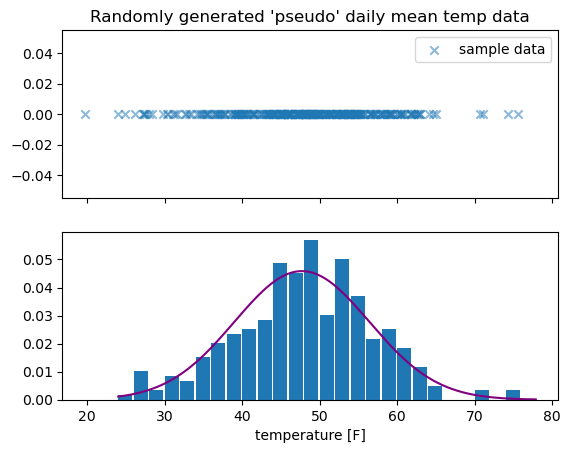

In [9]:
fig,ax=plt.subplots(2,1,sharex=True)
ax[0].scatter(x,ypos,marker='x',label='sample data',alpha=0.5)
ax[0].legend()
ax[0].set_title("Randomly generated 'pseudo' daily mean temp data")
ax[1].hist(x,bins=np.arange(24,78,2),width=1.8,density=True)
ax[1].set_xlabel("temperature [F]")

fig.show()


# add normal distribution PDF
temp_range=np.arange(24,78,0.1)
pdf=norm.pdf(temp_range,loc=m,scale=s)

ax[1].plot(temp_range,pdf,color='purple')

In [8]:
### (20230-04-10) Illustration: 95% confidence interval around the calculated mean


In [12]:
# sample size 30
n=30
m=27.0 # true mean
s=11.0
icount=0
print("calculated mean and lower and upper conf range" )
kmax=1000
for k in range(kmax):
    x=norm.rvs(loc=m,scale=s,size=n)
    mcalc=x.mean()
    df=n-1
    se=x.std()/np.sqrt(n)
    t95= t.interval(0.95,df)
    
    print(f"mcalc={mcalc:.3f} {(t95[0]*se+mcalc):.3f} - {(t95[1]*se+mcalc):.3f}")
    lower=(t95[0]*se+mcalc)
    upper=(t95[1]*se+mcalc)
    if (lower<m<upper):
        icount+=1
    else:
        print("true mean not in 95%CI")
print("percent of true mean inside 95%CI")
print(icount/kmax*100)



calculated mean and lower and upper conf range
mcalc=30.976 26.831 - 35.120
mcalc=29.656 26.008 - 33.303
mcalc=25.890 21.837 - 29.944
mcalc=26.651 22.565 - 30.738
mcalc=28.768 24.795 - 32.742
mcalc=29.087 25.059 - 33.115
mcalc=26.743 21.882 - 31.604
mcalc=30.590 25.703 - 35.476
mcalc=22.550 18.564 - 26.536
true mean not in 95%CI
mcalc=24.064 20.520 - 27.608
mcalc=29.929 25.801 - 34.056
mcalc=25.341 20.863 - 29.820
mcalc=25.438 22.514 - 28.362
mcalc=27.747 23.838 - 31.656
mcalc=25.112 20.639 - 29.584
mcalc=27.402 22.607 - 32.197
mcalc=28.007 23.391 - 32.622
mcalc=24.090 19.838 - 28.342
mcalc=22.924 19.103 - 26.745
true mean not in 95%CI
mcalc=29.644 25.395 - 33.893
mcalc=27.914 23.524 - 32.303
mcalc=27.054 22.694 - 31.414
mcalc=27.435 24.593 - 30.276
mcalc=26.661 23.220 - 30.103
mcalc=22.323 18.070 - 26.575
true mean not in 95%CI
mcalc=29.912 26.439 - 33.384
mcalc=29.031 25.512 - 32.550
mcalc=22.299 17.753 - 26.846
true mean not in 95%CI
mcalc=31.452 28.080 - 34.824
true mean not in 95%

### Summary:

The numerical experiment shows that indeed 95% of the time we can expect the true mean to be inside the 95% confidence interval.


#### Important to remember when we use the function Scipy package function `t.interval()`

In [11]:
message="Information about the function call t95=t.interval(0.95,df)"
print(len(message)*"*")
print("Information about the function call t95=t.interval(0.95,df)")
print(len(message)*"*")
print(f"lower and upper bounds of the 95% confidence level {t95[0]:.3f} , {t95[1]:.3f}")
print("type of the returned object function call 't.interval(0.95,df)':")
print(type(t95))

***********************************************************
Information about the function call t95=t.interval(0.95,df)
***********************************************************
lower and upper bounds of the 95% confidence level -2.045 , 2.045
type of the returned object function call 't.interval(0.95,df)':
<class 'tuple'>
